###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 0: Dataset preprocessing

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 4\\tic-tac-toe.data",header=None,delimiter=',')

In [3]:
df.columns=['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square',
            'middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class']

###  This dataset is unbalanced, (show how we can confirm this). Explain what is stratified sampling and Implement a stratified sampler.

Stratified Sampling is a sampling technique used to obtain samples that best represent the population. It reduces bias in selecting samples by dividing the population into homogeneous subgroups called strata, and randomly sampling data from each stratum(singular form of strata).

In machine learning algorithms this can cause problems down the line. If we go ahead and train our model on the sample data which has the wrong proportions it is likely that the model will be over-fitted to the training data and it is also likely that when we run the model against real-world or testing data that is in the right proportions it will underperform.

#### We can see that class is imbalanced by taking value_counts(). We see positive results are more than negative results

In [4]:
print((df['Class'].value_counts()) / len(df) * 100)

positive    65.344468
negative    34.655532
Name: Class, dtype: float64


In [5]:
def stratify_data(df,stratify_column_name,stratify_values,stratify_proportions,random_state=None):
    #df=dataframe
    #stratify_column_name=Class
    #stratify_values=['positive','negative']
    #stratify_proportions=[0.5,0.5]
    #random_state=Sets the random State
    
    df_stratified = pd.DataFrame(columns = df.columns)
    pos=-1
    
    for i in range (len(stratify_values)):
        pos+=1
        if pos == len(stratify_values) - 1: 
            ratio_len = len(df) - len(df_stratified) # This calculation is 958*0.5 - for negative class
        else:
            ratio_len = int(len(df) * stratify_proportions[i]) #This calculation is 958*0.5 -for positive class
            print(ratio_len)
        df_filtered = df[df[stratify_column_name] ==stratify_values[i]] # This is used to select first positive then negative samples
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state) # Sample the filtered data using the calculated ratio
        
        df_stratified = pd.concat([df_stratified, df_temp]) # Add the sampled / stratified datasets together to produce the final result
        
    return df_stratified # Return the stratified, re-sampled data  

In [6]:
stratify_values=['positive','negative']
stratify_proportions = [0.5,0.5]
df_stratified = stratify_data(df, 'Class', stratify_values, stratify_proportions, random_state=42)
df_stratified

479


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
102,x,x,b,x,o,o,x,b,o,positive
435,o,b,x,o,x,o,x,b,x,positive
270,x,b,o,b,x,o,o,x,x,positive
106,x,x,b,o,x,o,o,b,x,positive
71,x,x,x,b,b,o,o,o,x,positive
...,...,...,...,...,...,...,...,...,...,...
927,b,o,b,b,o,x,x,o,x,negative
878,o,b,b,b,o,x,x,x,o,negative
867,o,b,o,x,x,o,x,x,o,negative
660,x,x,b,x,x,o,o,o,o,negative


### Convert any non-numeric values to numeric values. For example you can replace a column name with an integer value or more appropriately use hot-one encoding. 

#### Please explain your solution.-First column had 3 values so they were converted to Blank,X and O columns and each gets filled to 0 and 1

In [7]:
df1=pd.get_dummies(df_stratified,columns=df_stratified.iloc[:,0:9].columns)
df1

,Class,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
102,positive,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
435,positive,0,1,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
270,positive,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
106,positive,0,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
71,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,negative,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
878,negative,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
867,negative,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
660,negative,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [8]:
df1["Class"] = df1["Class"].astype('category')
df1["Class"] = df1["Class"].cat.codes

In [9]:
df1.corr()

,Class,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
Class,1.000000,0.035825,-0.170360,0.137733,0.035608,0.098338,-0.124928,0.040943,-0.083828,0.048848,...,-0.149324,0.064568,-0.156746,0.101825,0.007197,0.117804,-0.121906,0.074822,-0.214393,0.151992
top-left-square_b,0.035825,1.000000,-0.400174,-0.434839,-0.011202,-0.059960,0.066798,-0.066452,0.084507,-0.028348,...,0.068210,-0.047730,0.029561,0.009999,-0.124907,0.060481,0.052058,0.000301,0.036703,-0.036377
top-left-square_o,-0.170360,-0.400174,1.000000,-0.651250,-0.024812,0.016531,0.006470,0.028033,-0.123356,0.098620,...,0.235643,0.016948,-0.086629,0.071665,0.054213,-0.227195,0.174403,0.003020,-0.056043,0.052797
top-left-square_x,0.137733,-0.434839,-0.651250,1.000000,0.033656,0.033406,-0.061670,0.027480,0.051235,-0.073432,...,-0.288029,0.022870,0.060645,-0.078700,0.050159,0.173164,-0.214478,-0.003216,0.024677,-0.021757
top-middle-square_b,0.035608,-0.011202,-0.024812,0.033656,1.000000,-0.410153,-0.503394,0.017896,0.045795,-0.060102,...,-0.015802,-0.027105,0.004124,0.018189,0.007273,-0.050016,0.042550,-0.067824,-0.014342,0.067701
top-middle-square_o,0.098338,-0.059960,0.016531,0.033406,-0.410153,1.000000,-0.581566,-0.038044,-0.043024,0.074086,...,0.074963,-0.018448,-0.216037,0.228588,0.035313,0.003218,-0.034635,0.052234,-0.197183,0.152891
top-middle-square_x,-0.124928,0.066798,0.006470,-0.061670,-0.503394,-0.581566,1.000000,0.020081,-0.000086,-0.016581,...,-0.056926,0.041655,0.200998,-0.232792,-0.039943,0.041564,-0.005140,0.011011,0.199606,-0.205239
top-right-square_b,0.040943,-0.066452,0.028033,0.027480,0.017896,-0.038044,0.020081,1.000000,-0.405540,-0.429251,...,0.032119,-0.003410,-0.007286,0.009999,-0.054331,0.039089,0.010114,-0.012801,0.047214,-0.036377
top-right-square_o,-0.083828,0.084507,-0.123356,0.051235,0.045795,-0.043024,-0.000086,-0.405540,1.000000,-0.651502,...,-0.001740,0.005013,-0.012503,0.008235,0.026758,-0.236023,0.207532,-0.041712,-0.119068,0.150191
top-right-square_x,0.048848,-0.028348,0.098620,-0.073432,-0.060102,0.074086,-0.016581,-0.429251,-0.651502,1.000000,...,-0.024938,-0.002123,0.018401,-0.016436,0.018654,0.200768,-0.213454,0.051839,0.078463,-0.118210


### Split the data into a train(80%) and test(20%).

In [10]:
df1_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df1_test=df1.drop(df1_train.index)

## Exercise 2: Implement Newton Algorithm for Logistic Regression

In [11]:
X=df1_train.iloc[:,1:28]
y=df1_train.iloc[:,0:1]
Xtest=df1_test.iloc[:,1:28]
ytest=df1_test.iloc[:,0:1]

In [12]:
m=len(y)
m1=len(ytest)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 
Xtest= np.hstack((np.ones([m1,1]), Xtest))
ytest=np.array(ytest).reshape(-1,1) 

In [13]:
def newton_algorithm(X,y,mu,tmax,epsilon,beta,Xtest,ytest):
    l=log_function(X,y,beta)
    abs_value=[]
    log_loss=[]
    loss_array=[]
    for i in range(tmax):
        y_hat=return_yhat(X,beta)
        hessian_inverse=find_hessian(X,y,y_hat)
        grad=gradient(X,y,y_hat)
        beta=beta-mu*np.dot(hessian_inverse,grad)
        l_old=l
        l=log_function(X,y,beta)
        loss_array.append(l-l_old)
        abs_value.append(abs(l_old-l)) #Absolute Value is computed
#         abs_value.append(abs((y_hat-return_yhat(X,beta))).mean())
#         log_loss.append(-1*log_function(Xtest,ytest,beta))
        log_loss.append(-1*log_loss_function(Xtest,ytest,beta)) #Log Loss is computed
        if(l-l_old<epsilon):
            return beta,abs_value,log_loss,loss_array
        elif(i==tmax):
            return "Not Converged"
        
def log_function(X,y,beta):
    log1=0
    for i in range(len(X)):
        log=np.dot(y[i:i+1,:],np.dot(X[i:i+1,:],beta))-np.log(1+exp(np.dot(X[i:i+1,:],beta)))
        log1+=log    
    return -log1

def log_loss_function(X,y,beta):
    log_loss=0
    A=np.dot(Xtest,beta)
    y_Pred=1.0 / (1.0 + np.exp(-A))
    log_loss=((ytest*np.log(y_Pred)+(1-ytest)*np.log(1-y_Pred))).mean()
    return log_loss

# def return_yhat(X,beta_1):
#     yhat=np.zeros((766,1))
#     for i in range(len(X)):
#         A=np.dot(X[i:i+1,:],beta_1)
#         np.append(yhat, 1.0 / (1.0 + exp(-A)))
#         print(yhat)
#     return yhat
# def return_yhat(X,beta_1):
#     arr1=[]
#     for i in range(len(X)):
#         A=np.dot(X[i:i+1,:],beta_1)
#         val=1.0 / (1.0 + exp(-A))
#         arr1.append(val)
# #         print(yhat)
#     return np.reshape(arr1,[len(arr1),1])

def return_yhat(X,beta_1):
    
    A=np.dot(X,beta_1)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat

def gradient(X,y,y_hat):
    grad=np.dot(X.T,(y-y_hat))
    return grad

def find_hessian(X,y,y_hat):
    diag1=np.diag(y_hat*(1-y_hat))
    H=np.dot((X.T*diag1),X)
    H_inverse=np.linalg.inv(H)
    return H_inverse
    

In [20]:
beta=np.zeros((28,1))
mu=0.000333
# mu=0.0005
tmax=1000
epsilon=0.00006
beta_new,abs_value,log_loss,loss_array=newton_algorithm(X,y,mu,tmax,epsilon,beta,Xtest,ytest)
print(abs_value)
print(beta_new)
print(log_loss)

[array([[0.25276835]]), array([[0.25512323]]), array([[0.21139616]]), array([[0.28865144]]), array([[0.19414032]]), array([[0.25677641]]), array([[0.25646007]]), array([[0.21328334]]), array([[0.26589592]]), array([[0.22623266]]), array([[0.11489461]]), array([[0.18744386]]), array([[0.21728102]]), array([[0.27202201]]), array([[0.04593853]])]
[[ 4.28955342e+12]
 [ 3.03930562e+12]
 [ 3.03930562e+12]
 [ 3.03930562e+12]
 [-7.23820356e+11]
 [-7.23820356e+11]
 [-7.23820356e+11]
 [-8.69356442e+12]
 [-8.69356442e+12]
 [-8.69356442e+12]
 [-3.94590302e+12]
 [-3.94590302e+12]
 [-3.94590302e+12]
 [ 7.02963287e+12]
 [ 7.02963287e+12]
 [ 7.02963287e+12]
 [ 1.03457949e+12]
 [ 1.03457949e+12]
 [ 1.03457949e+12]
 [-2.69491064e+12]
 [-2.69491064e+12]
 [-2.69491064e+12]
 [ 6.65127044e+11]
 [ 6.65127044e+11]
 [ 6.65127044e+11]
 [ 3.33312188e-02]
 [ 5.35635703e-02]
 [ 1.61296875e-02]]
[0.6938999582323415, 0.6939932775485635, 0.6943335608646067, 0.6946165306433005, 0.694850345501562, 0.6951356621780613, 0

### • In each iteration of the algorithm calculate |f(xi−1)−f(xi)| and at the end of learning, plot it against iteration number i. Explain the graph.


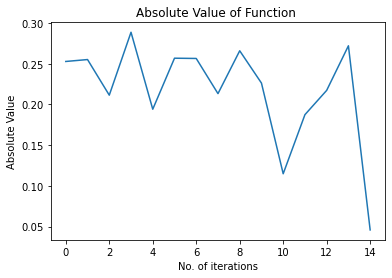

In [21]:
plt.title('Absolute Value of Function ')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value,[len(abs_value),1]))
plt.ylim()
plt.xlim()
plt.show()

#### From the Absolute Function graph we can see over initial iterations absolute loss increasing and decreasing but at 14 iteration it reaches nearly zero. Rate of convergence is higher in Newtons Algorithm. Te range of fluctuation between values os 0.25

### • In each iteration step also calculate logloss on test set

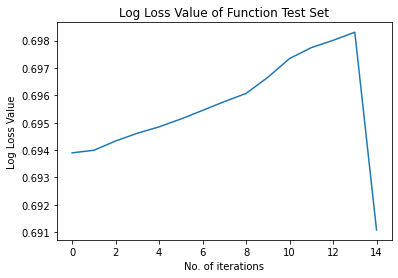

In [22]:
plt.title('Log Loss Value of Function Test Set')
plt.xlabel('No. of iterations')
plt.ylabel('Log Loss Value')
plt.plot(np.reshape(log_loss,[len(log_loss),1]))
plt.ylim()
plt.xlim()
plt.show()


#### Log Loss is plotted using formula $Log Loss =-(1/N)*  \sum \limits _{m=1} ^{M} y_{i}*log(p(y_{i}))+(1-y_{i})*log(1-p(y_{i}))$

#### As we can see Log Loss increases by 0.004 over 12 iterations. After that there is a sudden decrease near the 14 iteration.

#### Comment on the rate of convergence in the light of plots from above. Rate of Convergence is high as compared to gradient acsent algorithm . Newtons algotitmn converges in over 14 iterations. Newtons algorithm uses second derivative Hessian Matrix Inverse for finding direction of search. Also the function used shouls be twice differentiable. If the first derivation equals zero then the program would give division by zero error. Because calculation of inverse is expensive in real world area where there are 1000 of parameters, Newton is not considered as the best option

#### References:
 - https://www.geeksforgeeks.org/stratified-sampling-in-pandas/#:~:text=Stratified%20Sampling%20is%20a%20sampling,(singular%20form%20of%20strata).
 - https://towardsdatascience.com/stratified-random-sampling-using-python-and-pandas-1c84f0362ebc
 - https://pbpython.com/categorical-encoding.html
 - https://www.kaggle.com/dansbecker/what-is-log-loss
 - https://www.baeldung.com/cs/gradient-descent-vs-newtons-gradient-descent